In [126]:
import pandas as pd
import webbrowser
import os
# Read the CSV file into a pandas DataFrame
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin Bisot\HyphaeBiomass\CB\CB"
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin Bisot\HyphaeBiomass\CB"
file = "Africa_biomassd.csv"
file = "summary_no_duplicate.xlsx"
csv_file = os.path.join(path,file)
# data = pd.read_csv(csv_file)
data = pd.read_excel(csv_file)
print(len(data))
data = data[data['status']!="done"]
data = data[data['status']!="data!"]

print(len(data))

# Assuming the column containing URLs is named "ArticleURL"
urls = data['ArticleURL']

# Open each URL in the default web browser
for url in urls[:5]:
    # print(url)
    print(url)
    webbrowser.open_new_tab(url)

555
2
https://elibrary.ru/item.asp?id=38237758
https://elibrary.ru/item.asp?id=37024749


C:\Users\coren\AppData\Local\Temp\ipykernel_15120\671964005.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for url in urls[:5]:


In [104]:
df = pd.read_excel(csv_file)
print(len(df))

# Step 3: Remove duplicates based on a specific column (e.g., 'Column1')
df.drop_duplicates(subset='Title', keep='first', inplace=True)
print(len(df))
# Step 4: Write the DataFrame back to Excel
output_file_path = "summary_no_duplicate.xlsx"
output_file_path = os.path.join(path,output_file_path)

df.to_excel(output_file_path, index=False)

580
555


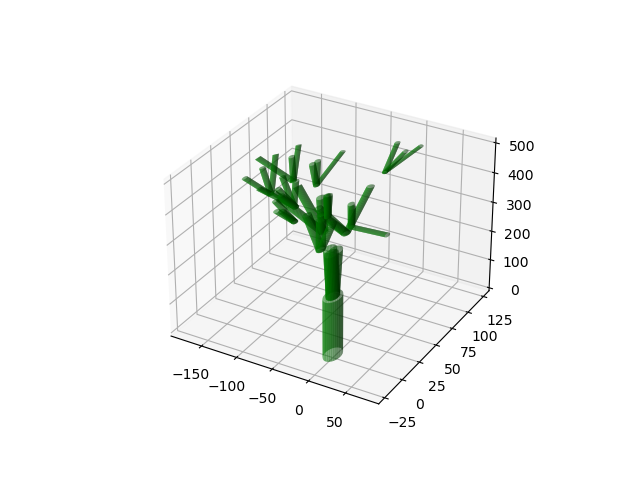

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cylinder(start, end, radius, ax):
    # Create a cylinder between `start` and `end` coordinates with a given `radius`
    vector = end - start
    length = np.linalg.norm(vector)
    unit_vector = vector / length
    
    # Create cylinder
    phi = np.linspace(0, 2 * np.pi, 30)
    z = np.linspace(0, length, 2)
    Z, PHI = np.meshgrid(z, phi)
    X = radius * np.sin(PHI) + start[0]
    Y = radius * np.cos(PHI) + start[1]
    Z = Z + start[2]
    
    # Apply rotation
    rot_axis = np.cross(np.array([0, 0, 1]), unit_vector)
    rot_angle = np.arccos(np.dot(np.array([0, 0, 1]), unit_vector))
    rot_matrix = np.array([
        [np.cos(rot_angle) + rot_axis[0] ** 2 * (1 - np.cos(rot_angle)),
         rot_axis[0] * rot_axis[1] * (1 - np.cos(rot_angle)) - rot_axis[2] * np.sin(rot_angle),
         rot_axis[0] * rot_axis[2] * (1 - np.cos(rot_angle)) + rot_axis[1] * np.sin(rot_angle)],
        [rot_axis[1] * rot_axis[0] * (1 - np.cos(rot_angle)) + rot_axis[2] * np.sin(rot_angle),
         np.cos(rot_angle) + rot_axis[1] ** 2 * (1 - np.cos(rot_angle)),
         rot_axis[1] * rot_axis[2] * (1 - np.cos(rot_angle)) - rot_axis[0] * np.sin(rot_angle)],
        [rot_axis[2] * rot_axis[0] * (1 - np.cos(rot_angle)) - rot_axis[1] * np.sin(rot_angle),
         rot_axis[2] * rot_axis[1] * (1 - np.cos(rot_angle)) + rot_axis[0] * np.sin(rot_angle),
         np.cos(rot_angle) + rot_axis[2] ** 2 * (1 - np.cos(rot_angle))]
    ])
    
    rotated = np.dot(rot_matrix, np.array([X.flatten() - start[0], Y.flatten() - start[1], Z.flatten() - start[2]]))
    X = rotated[0] + start[0]
    Y = rotated[1] + start[1]
    Z = rotated[2] + start[2]
    
    # Plot cylinder surface
    ax.plot_surface(X.reshape(30, 2), Y.reshape(30, 2), Z.reshape(30, 2), color="green", alpha=0.6)

def create_branch(start, direction, length, radius, ax, generations):
    if generations == 0:
        return
    
    end = start + length * direction
    plot_cylinder(start, end, radius, ax)
    
    new_start = end
    new_length = length * 0.7
    new_radius = radius * 0.7
    
    for _ in range(3):
        angle = np.random.uniform(0, np.pi / 4)
        axis = np.cross(direction, np.random.randn(3))
        axis = axis / np.linalg.norm(axis)
        
        rot_matrix = np.array([
            [np.cos(angle) + axis[0] ** 2 * (1 - np.cos(angle)),
             axis[0] * axis[1] * (1 - np.cos(angle)) - axis[2] * np.sin(angle),
             axis[0] * axis[2] * (1 - np.cos(angle)) + axis[1] * np.sin(angle)],
            [axis[1] * axis[0] * (1 - np.cos(angle)) + axis[2] * np.sin(angle),
             np.cos(angle) + axis[1] ** 2 * (1 - np.cos(angle)),
             axis[1] * axis[2] * (1 - np.cos(angle)) - axis[0] * np.sin(angle)],
            [axis[2] * axis[0] * (1 - np.cos(angle)) - axis[1] * np.sin(angle),
             axis[2] * axis[1] * (1 - np.cos(angle)) + axis[0] * np.sin(angle),
             np.cos(angle) + axis[2] ** 2 * (1 - np.cos(angle))]
        ])
        
        new_direction = np.dot(rot_matrix, direction)
        create_branch(new_start, new_direction, new_length, new_radius, ax, generations - 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize tree starting parameters
start = np.array([0, 0, 0])
direction = np.array([0, 0, 1])
length = 200
radius = 10

# Create the tree
create_branch(start, direction, length, radius, ax, generations=4)

plt.show()


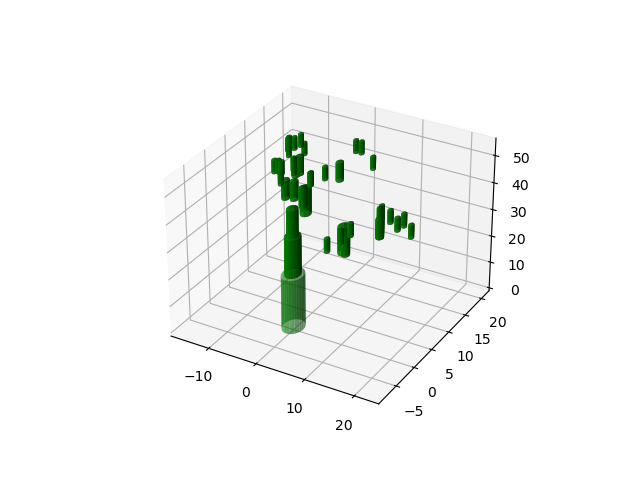

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cylinder(start, end, radius, ax):
    length = np.linalg.norm(end - start)
    phi = np.linspace(0, 2 * np.pi, 30)
    z = np.linspace(0, length, 2)
    Z, PHI = np.meshgrid(z, phi)
    X = radius * np.sin(PHI) + start[0]
    Y = radius * np.cos(PHI) + start[1]
    Z = Z + start[2]
    
    ax.plot_surface(X, Y, Z, color='green', alpha=0.6)

def create_branch(start, direction, length, radius, ax, generations):
    if generations == 0:
        return
    
    # Calculate end point
    end = start + length * direction
    
    # Draw cylinder
    plot_cylinder(start, end, radius, ax)
    
    new_start = end
    new_length = length * 0.7
    new_radius = radius * 0.7
    
    # Generate new branches
    for _ in range(3):
        angle = np.random.uniform(0, np.pi / 4)
        
        # Create rotation axis perpendicular to the direction
        axis = np.cross(direction, np.random.randn(3))
        axis = axis / np.linalg.norm(axis)
        
        # Create rotation matrix
        rot_matrix = np.array([
            [np.cos(angle) + axis[0]**2 * (1 - np.cos(angle)),
             axis[0] * axis[1] * (1 - np.cos(angle)) - axis[2] * np.sin(angle),
             axis[0] * axis[2] * (1 - np.cos(angle)) + axis[1] * np.sin(angle)],
            [axis[1] * axis[0] * (1 - np.cos(angle)) + axis[2] * np.sin(angle),
             np.cos(angle) + axis[1]**2 * (1 - np.cos(angle)),
             axis[1] * axis[2] * (1 - np.cos(angle)) - axis[0] * np.sin(angle)],
            [axis[2] * axis[0] * (1 - np.cos(angle)) - axis[1] * np.sin(angle),
             axis[2] * axis[1] * (1 - np.cos(angle)) + axis[0] * np.sin(angle),
             np.cos(angle) + axis[2]**2 * (1 - np.cos(angle))]
        ])
        
        new_direction = np.dot(rot_matrix, direction)
        
        # Normalize the new direction
        new_direction = new_direction / np.linalg.norm(new_direction)
        
        # Generate new branch
        create_branch(new_start, new_direction, new_length, new_radius, ax, generations - 1)

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize tree starting parameters
start = np.array([0, 0, 0])
direction = np.array([0, 0, 1])
length = 20
radius = 2

# Create the tree
create_branch(start, direction, length, radius, ax, generations=5)

plt.show()
